# Get Names of Images Including Person

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import uuid
import cv2
import numpy as np
from random import randint
import random
from PIL import Image
import json

In [2]:
img_dir = "./bee_flowers_data"
jpg_src = glob.glob(os.path.join(img_dir, "*.jpg"))
no_of_images = len(jpg_src)
print("No. of images {}".format(no_of_images))

No. of images 996


In [22]:
flowers_img_dir = "./flower_bushes_data"
flowers_jpg_src = glob.glob(os.path.join(flowers_img_dir, "*.jpg"))
no_of_flower_images = len(flowers_jpg_src)
print("No. of images {}".format(no_of_flower_images))

No. of images 988


In [3]:
#img_basenames = []
#img_names = []
#for jpg_path in jpg_src:
#    img_basename = os.path.basename(jpg_path)
#    img_basenames.append(img_basename)
#    img_onlyname = os.path.splitext(img_basename)
#    img_names.append(img_onlyname[0])
#print(img_basenames[0])
#print(img_names[0])

In [4]:
with open(os.path.join(img_dir, 'via_export_json.json')) as json_file:
    annotation_data = json.load(json_file)
json_file.close()

In [5]:
list(annotation_data.keys())[0]

'3233433_4cc04081c2_b.jpg226137'

In [29]:
entry_names = [name for name in annotation_data]
#entry_names

In [31]:
annotation_data[entry_names[0]] #example output

{'filename': '3233433_4cc04081c2_b.jpg',
 'size': 226137,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 292,
    'y': 159,
    'width': 347,
    'height': 310},
   'region_attributes': {}}],
 'file_attributes': {}}

In [8]:
img_entry_names = {} #mapping between actual filename and entry name .jpg###### of json
for entry_name in entry_names:
    img_entry_names[annotation_data[entry_name]['filename']] = entry_name
img_names = list(img_entry_names.keys())

In [33]:
annotation_data[img_entry_names["44257168542_1c2753880a_b.jpg"]] #example output

{'filename': '44257168542_1c2753880a_b.jpg',
 'size': 145741,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 8435.0,
    'y': 1794.8188360055549,
    'width': 226.0,
    'height': 357.42232321957107},
   'region_attributes': {}}],
 'file_attributes': {}}

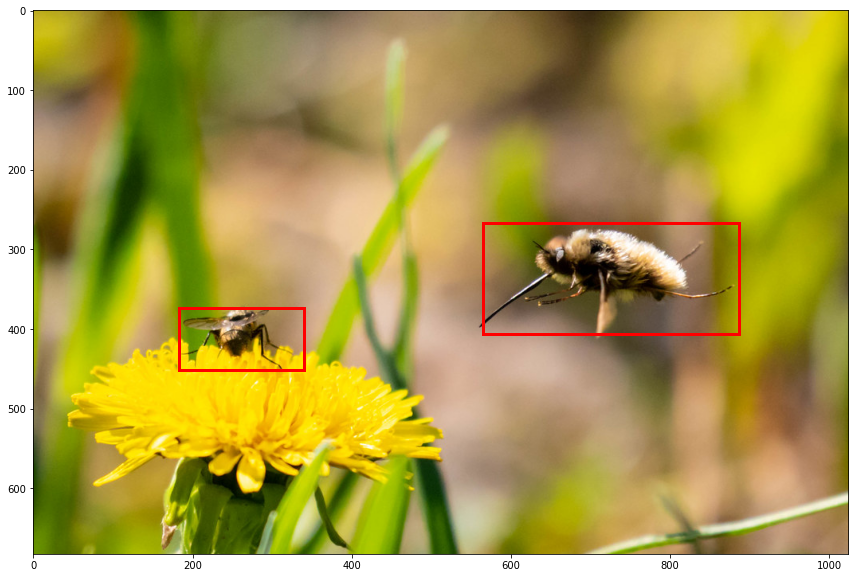

In [9]:
rand_img_name = img_names[randint(0, no_of_images)]
rand_img_name = '41603812094_1458d0ee9c_b.jpg'
test_img = plt.imread(os.path.join(img_dir, rand_img_name))

fig, ax = plt.subplots(figsize = (15, 10))
ax.imshow(test_img)
for region in annotation_data[img_entry_names[rand_img_name]]['regions']:
    shape = region['shape_attributes']
    rect = patches.Rectangle((shape["x"], shape["y"]), shape['width'], shape['height'], linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

# Generate Sub Images

In [10]:
mosaic_images_dir = "./mosaic_data/"
if not os.path.exists(mosaic_images_dir):
    os.makedirs(mosaic_images_dir)

In [11]:
img_stacking_shape = (4,6) #4 subimages on y axis and 6 on x axis
no_subimages = img_stacking_shape[0] * img_stacking_shape[1]

{'filename': '37343642486_050b7ed70a_b.jpg', 'size': 170167, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 469, 'y': 288, 'width': 158, 'height': 136}, 'region_attributes': {}}], 'file_attributes': {}}


{'filename': '35263767773_de01a20b85_b.jpg', 'size': 155088, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 241, 'y': 129, 'width': 278, 'height': 517}, 'region_attributes': {}}], 'file_attributes': {}}


{'filename': '36624437613_615dc45b88_b.jpg', 'size': 129346, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 360, 'y': 120, 'width': 289, 'height': 281}, 'region_attributes': {}}], 'file_attributes': {}}


{'filename': '40472591700_42c8da0017_b.jpg', 'size': 109543, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 3611.0, 'y': 1835.103953147877, 'width': 427.0, 'height': 315.4084919472914}, 'region_attributes': {}}], 'file_attributes': {}}


{'filename': '44257168542_1c2753880a_b.jpg', 'size': 145741, 'regions': [{'shape_attributes': {'name': 'rect', 'x':

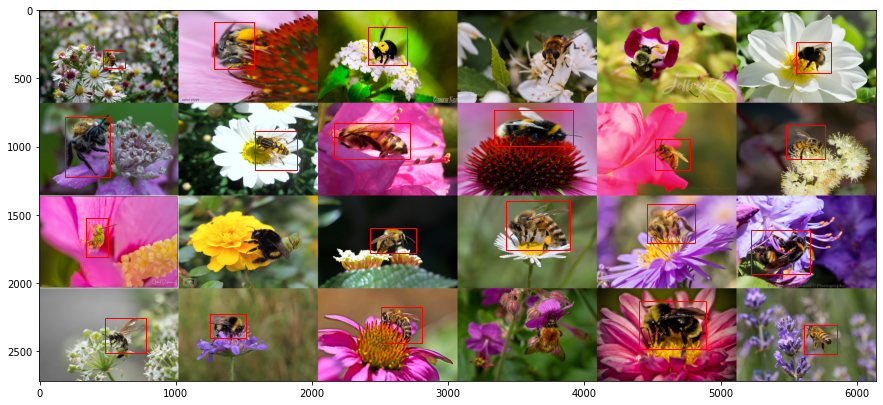

In [25]:
filename = str(uuid.uuid4())
mosaic_img_annotation = {"filename": filename + '.jpg', 'file_attributes': {},"regions": []}
fig, ax = plt.subplots(figsize = (15, 10))

for i in range(img_stacking_shape[0]): #row-wise 
    for j in range(img_stacking_shape[1]): # column-wise
        resize_scale = (1.0, 1.0)
        img_name = img_names[randint(0,no_of_images)]
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)
        img = np.array(img)
        if i == 0 and j == 0: 
            sub_img_shape = img.shape[0:2] #initial image determines subimage size for all following images
        else: 
            resize_scale = (sub_img_shape[0] / img.shape[0], sub_img_shape[1] / img.shape[1])
            img = cv2.resize(img, dsize=(sub_img_shape[1], sub_img_shape[0]), interpolation=cv2.INTER_CUBIC)
                
        if j == 0: img_row = img
        else: img_row = np.hstack((img_row, img))
            
        #Resizing annotations
        sub_img_annotation = annotation_data[img_entry_names[img_name]]
        print(sub_img_annotation)
        print("\n")
        regions = sub_img_annotation['regions']
        #print("No. of bees in subimage: {}".format(len(sub_img_annotatio['regions'])))
        for region in regions:
            shape_attributes = region["shape_attributes"]
            shape_attributes["y"] = shape_attributes["y"] * resize_scale[0] + (i * sub_img_shape[0])
            shape_attributes["x"] = shape_attributes["x"] * resize_scale[1] + (j * sub_img_shape[1])
            shape_attributes["height"] *= resize_scale[0]
            shape_attributes["width"] *= resize_scale[1]
            region["shape_attributes"] = shape_attributes
            mosaic_img_annotation['regions'].append(region)
            
    if i == 0: stack = img_row
    else: stack = np.vstack((stack, img_row))
        
for region in mosaic_img_annotation['regions']:
    shape = region['shape_attributes']
    rect = patches.Rectangle((shape["x"], shape["y"]), shape['width'], shape['height'], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.imshow(stack)
plt.show()
#print(mosaic_img_annotation)